## Spotify Music Data Analysis

In this project, we will anaslyse data from Spotify.

We will aim to answer the following questions:
1. What makes a song popular?
2. How have musical tastes evolved over the decades?
3. What is the optimal song length and tempo for maximum popularity?

In [58]:
pip install pandas numpy matplotlib seaborn jupyter 

Note: you may need to restart the kernel to use updated packages.


In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load my data
df = pd.read_csv('C:\\Users\\Lana0\\Documents\\spotify-music-analysis\\data\\raw\\dataset.csv')

print(df.shape)
print(df.head())
print(df.info())

(114000, 21)
   Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826 

In [60]:
print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

# Display basic info
print("\n📊 Dataset Overview:")
print(df.head())

print(f"\n📈 Dataset Info:")
print(df.info())

print(f"\n🔍 Missing Values:")
print(df.isnull().sum())

# Basic statistics
print(f"\n📋 Basic Statistics:")
print(df.describe())

print(f"After cleaning - Shape: {df.shape}")

Dataset shape: (114000, 21)
Columns: ['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name', 'popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'track_genre']

📊 Dataset Overview:
   Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou..

## Data Cleaning

In [61]:
# Check for duplicates
print(f"Duplicate rows: {df.duplicated().sum()}")

# Remove duplicates if any
df = df.drop_duplicates()

Duplicate rows: 0


In [62]:
# Check which rows have missing values
print("Rows with missing artist names:", df['artists'].isnull().sum())
print("Rows with missing album names:", df['album_name'].isnull().sum()) 
print("Rows with missing track names:", df['track_name'].isnull().sum())


Rows with missing artist names: 1
Rows with missing album names: 1
Rows with missing track names: 1


In [63]:
# Fill missing values with placeholders
df['artists'] = df['artists'].fillna('Unknown Artist')
df['album_name'] = df['album_name'].fillna('Unknown Album')
df['track_name'] = df['track_name'].fillna('Unknown Track')
print(f"\n🔍 Missing Values:")
print(df.isnull().sum())


print(f"After cleaning - Shape: {df.shape}")



🔍 Missing Values:
Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64
After cleaning - Shape: (114000, 21)


## Exploratory Data Analysis

Text(0.5, 1.0, 'Audio Features Correlation')

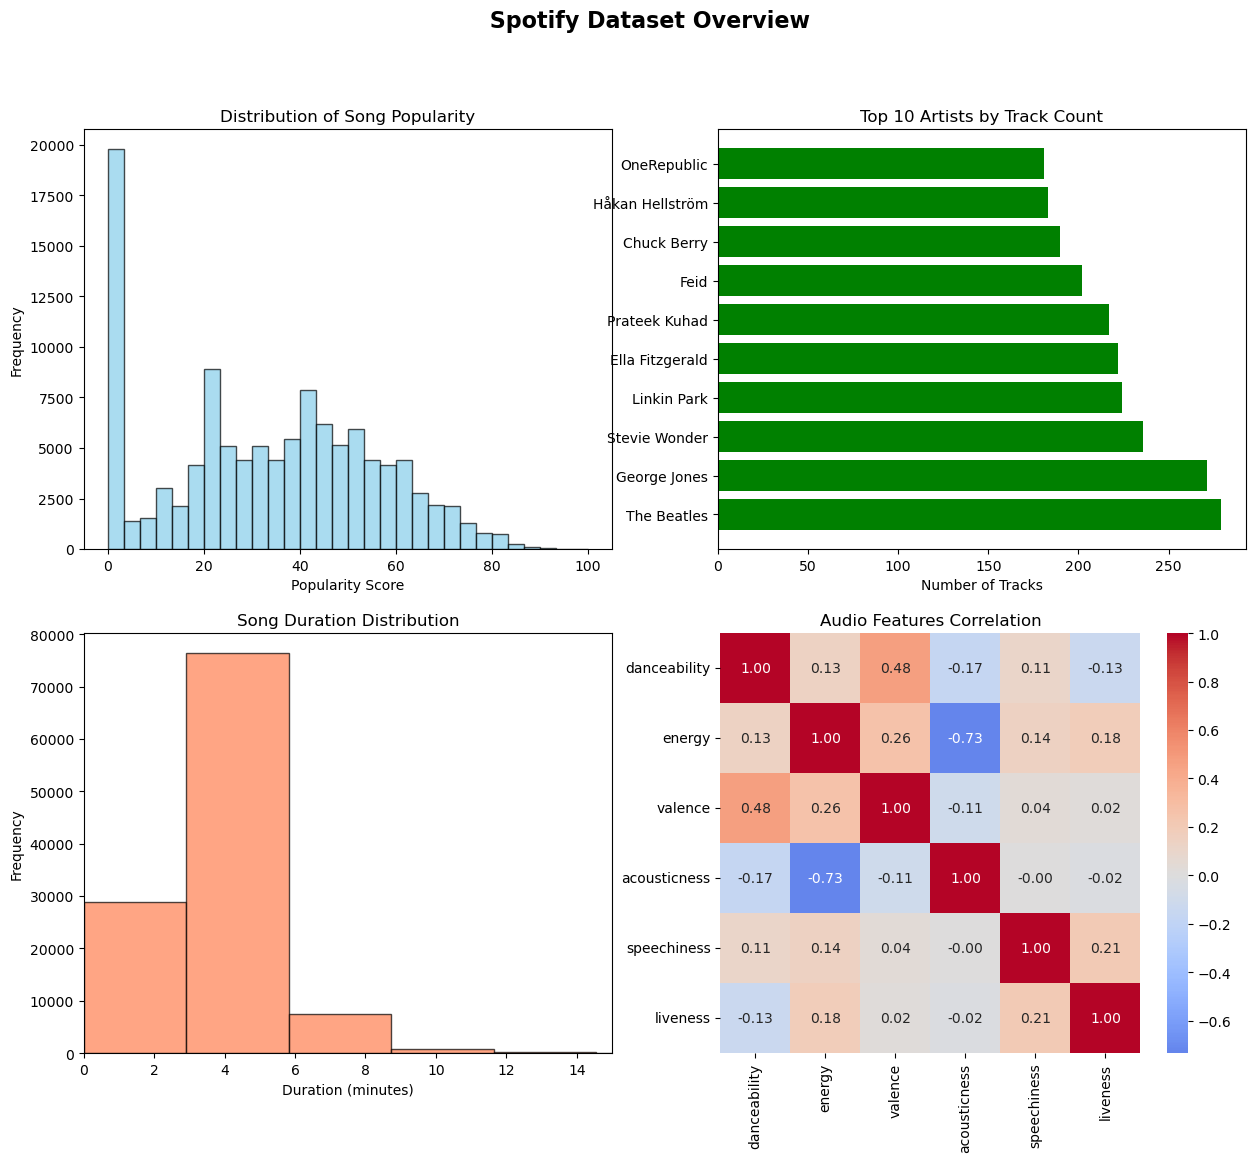

In [64]:
# Define available audio features for this dataset
audio_features = ['danceability', 'energy', 'valence', 'acousticness', 'speechiness', 
                 'liveness', 'instrumentalness', 'loudness', 'tempo']
#  Create a figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle(' Spotify Dataset Overview', fontsize=16, fontweight='bold')
# Plot 1: Distribution of Popularity
if 'popularity' in df.columns:
    axes[0,0].hist(df['popularity'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0,0].set_title('Distribution of Song Popularity')
    axes[0,0].set_xlabel('Popularity Score')
    axes[0,0].set_ylabel('Frequency')
    
# Plot 2: Artist Distribution
    top_artists = df['artists'].value_counts().head(10)
    axes[0,1].barh(range(len(top_artists)), top_artists.values, color='green')
    axes[0,1].set_yticks(range(len(top_artists)))
    axes[0,1].set_yticklabels(top_artists.index)
    axes[0,1].set_title('Top 10 Artists by Track Count')
    axes[0,1].set_xlabel('Number of Tracks')

# Plot 3: Duration Distribution
axes[1,0].hist(df['duration_ms']/1000/60, bins=30, alpha=0.7, color='coral', edgecolor='black')
axes[1,0].set_title('Song Duration Distribution')
axes[1,0].set_xlabel('Duration (minutes)')
axes[1,0].set_ylabel('Frequency')
axes[1,0].set_xlim(0,15)

# Plot 4: Audio Features Correlation
correlation_features = ['danceability', 'energy', 'valence', 'acousticness', 'speechiness', 'liveness']
correlation_matrix = df[correlation_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            ax=axes[1,1], square=True, fmt='.2f')
axes[1,1].set_title('Audio Features Correlation')



  

## What makes a song popular?


📊 Correlation with Popularity:
Danceability: 0.035
Energy: 0.001
Valence: -0.041
Acousticness: -0.025
Speechiness: -0.045
Liveness: -0.005


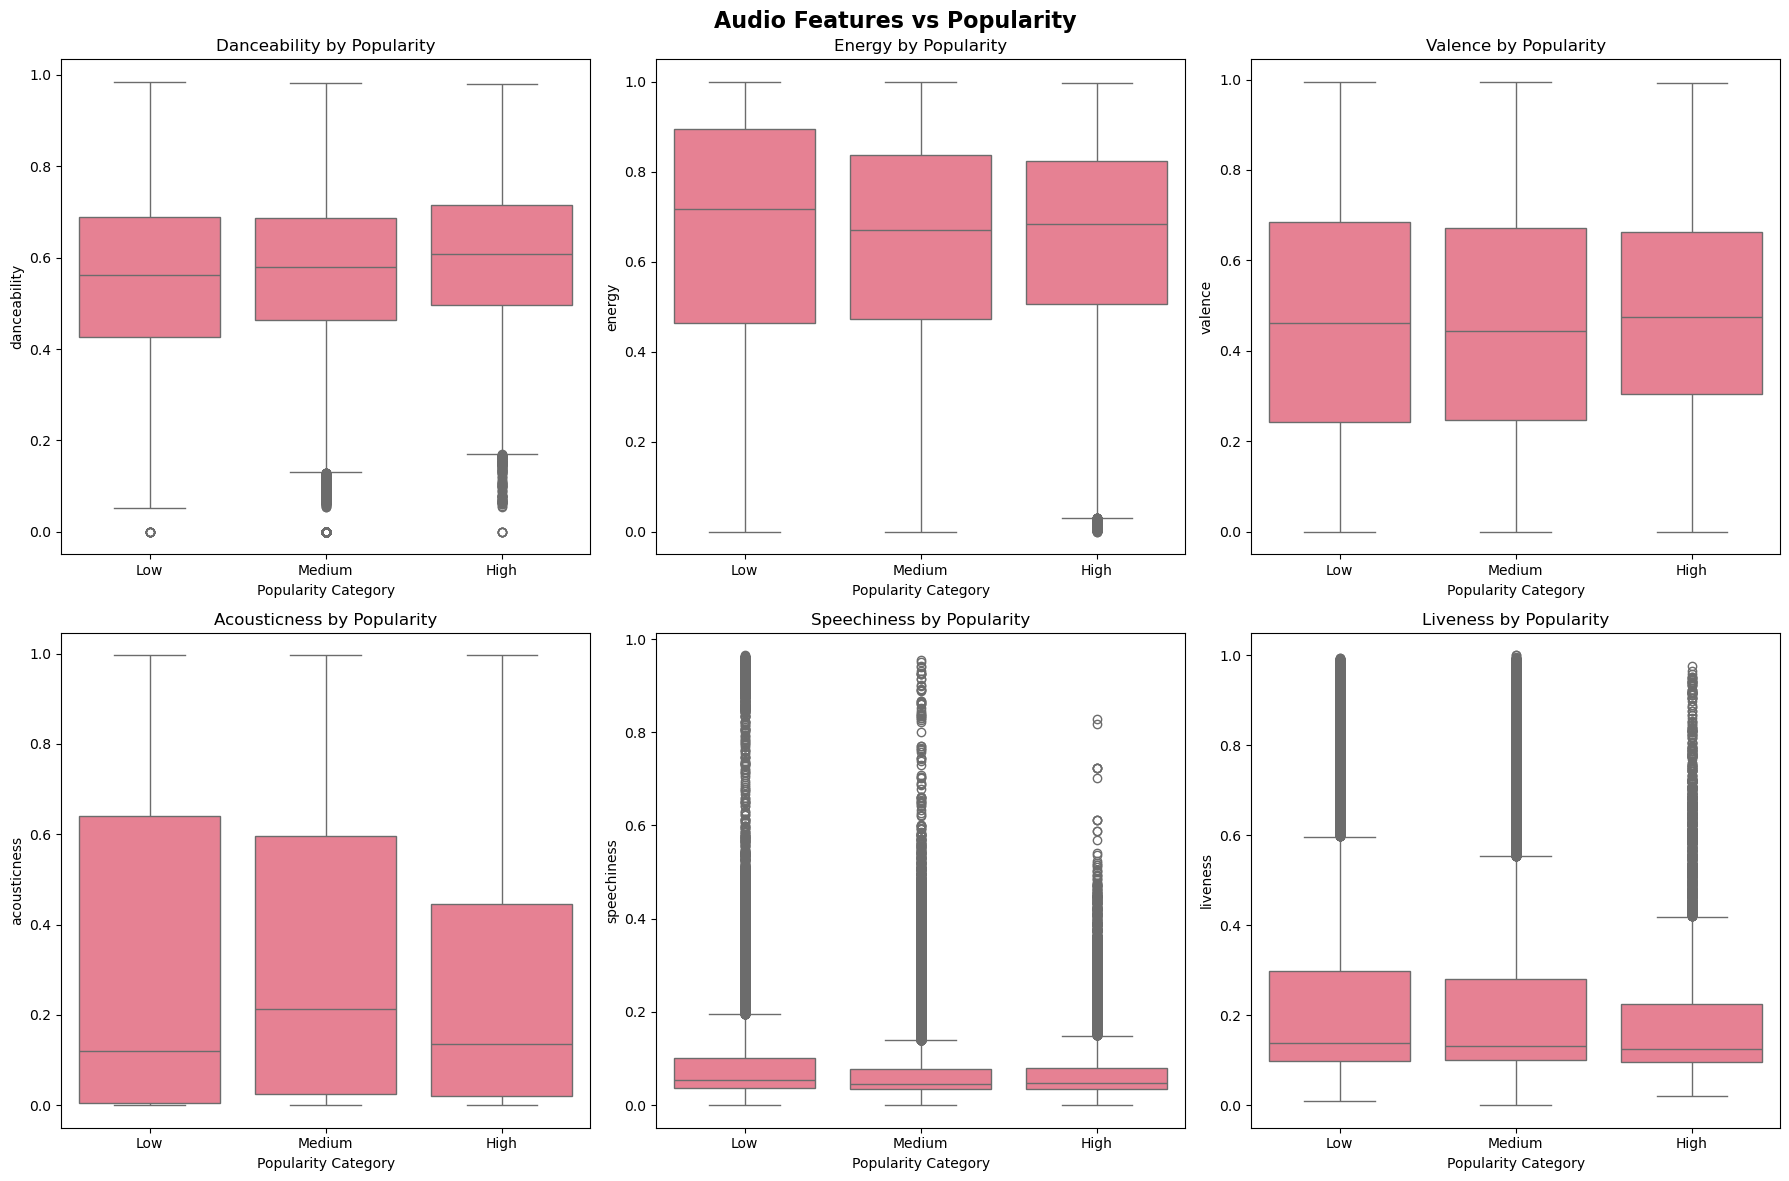

In [66]:
if 'popularity' in df.columns and len(available_features) > 0:
    
    # Create popularity categories
    df['popularity_category'] = pd.cut(df['popularity'], 
                                     bins=[0, 30, 60, 100], 
                                     labels=['Low', 'Medium', 'High'])
    
    # Analyze audio features by popularity
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('Audio Features vs Popularity', fontsize=16, fontweight='bold')
    
    for i, feature in enumerate(available_features[:6]):
        row, col = i // 3, i % 3
        
        # Box plot showing feature distribution by popularity category
        sns.boxplot(data=df, x='popularity_category', y=feature, ax=axes[row, col])
        axes[row, col].set_title(f'{feature.title()} by Popularity')
        axes[row, col].set_xlabel('Popularity Category')
    
    plt.tight_layout()
    
    
    # Calculate correlations
    print("\n📊 Correlation with Popularity:")
    for feature in available_features:
        corr = df[feature].corr(df['popularity'])
        print(f"{feature.title()}: {corr:.3f}")

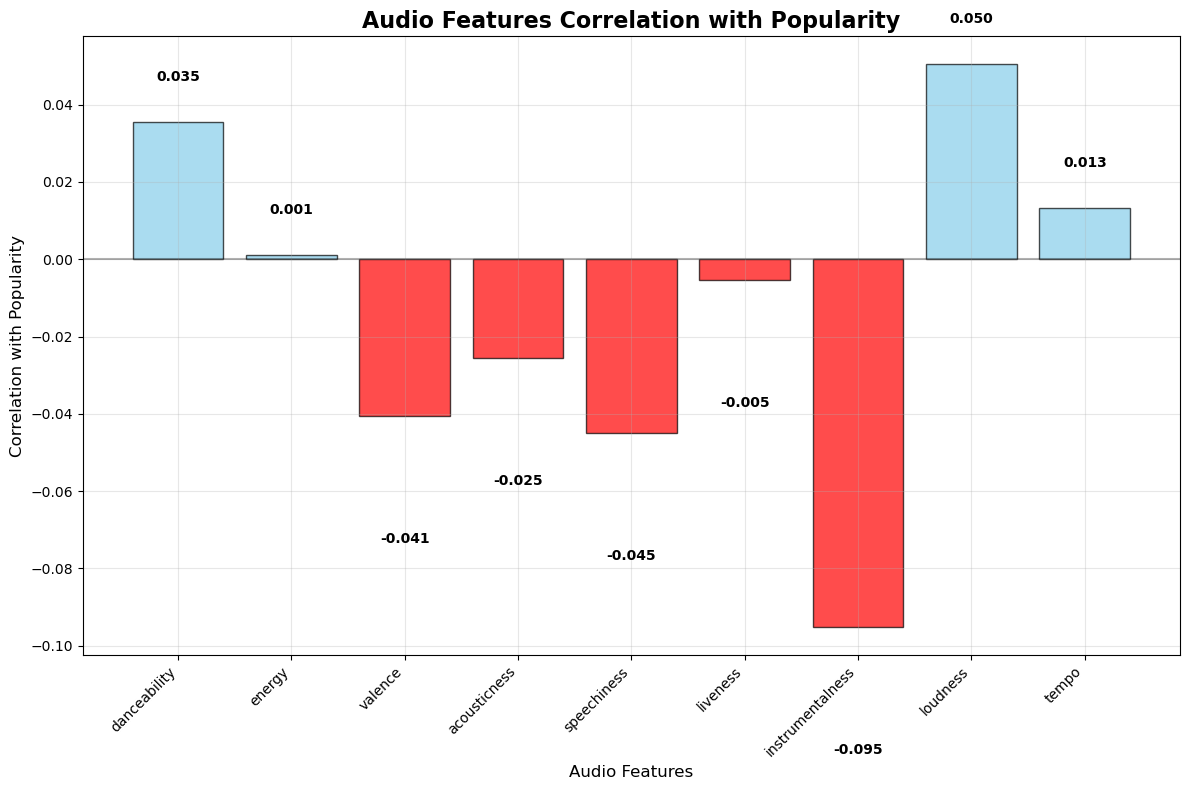

In [ ]:
# Calculate correlations for all audio features
audio_features_list = ['danceability', 'energy', 'valence', 'acousticness', 
                      'speechiness', 'liveness', 'instrumentalness', 'loudness', 'tempo']

correlations = []
for feature in audio_features_list:
    corr = df[feature].corr(df['popularity'])
    correlations.append(corr)

# Create correlation bar chart
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
colors = ['red' if x < 0 else 'skyblue' for x in correlations]
bars = ax.bar(audio_features_list, correlations, color=colors, alpha=0.7, edgecolor='black')

# Customize the plot
ax.set_title('Audio Features Correlation with Popularity', fontsize=16, fontweight='bold')
ax.set_xlabel('Audio Features', fontsize=12)
ax.set_ylabel('Correlation with Popularity', fontsize=12)
ax.axhline(y=0, color='black', linestyle='-', alpha=0.3)
ax.grid(True, alpha=0.3)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add correlation values on top of bars
for bar, corr in zip(bars, correlations):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + (0.01 if height > 0 else -0.03),
            f'{corr:.3f}', ha='center', va='bottom' if height > 0 else 'top', fontweight='bold')

plt.tight_layout()

plt.show()


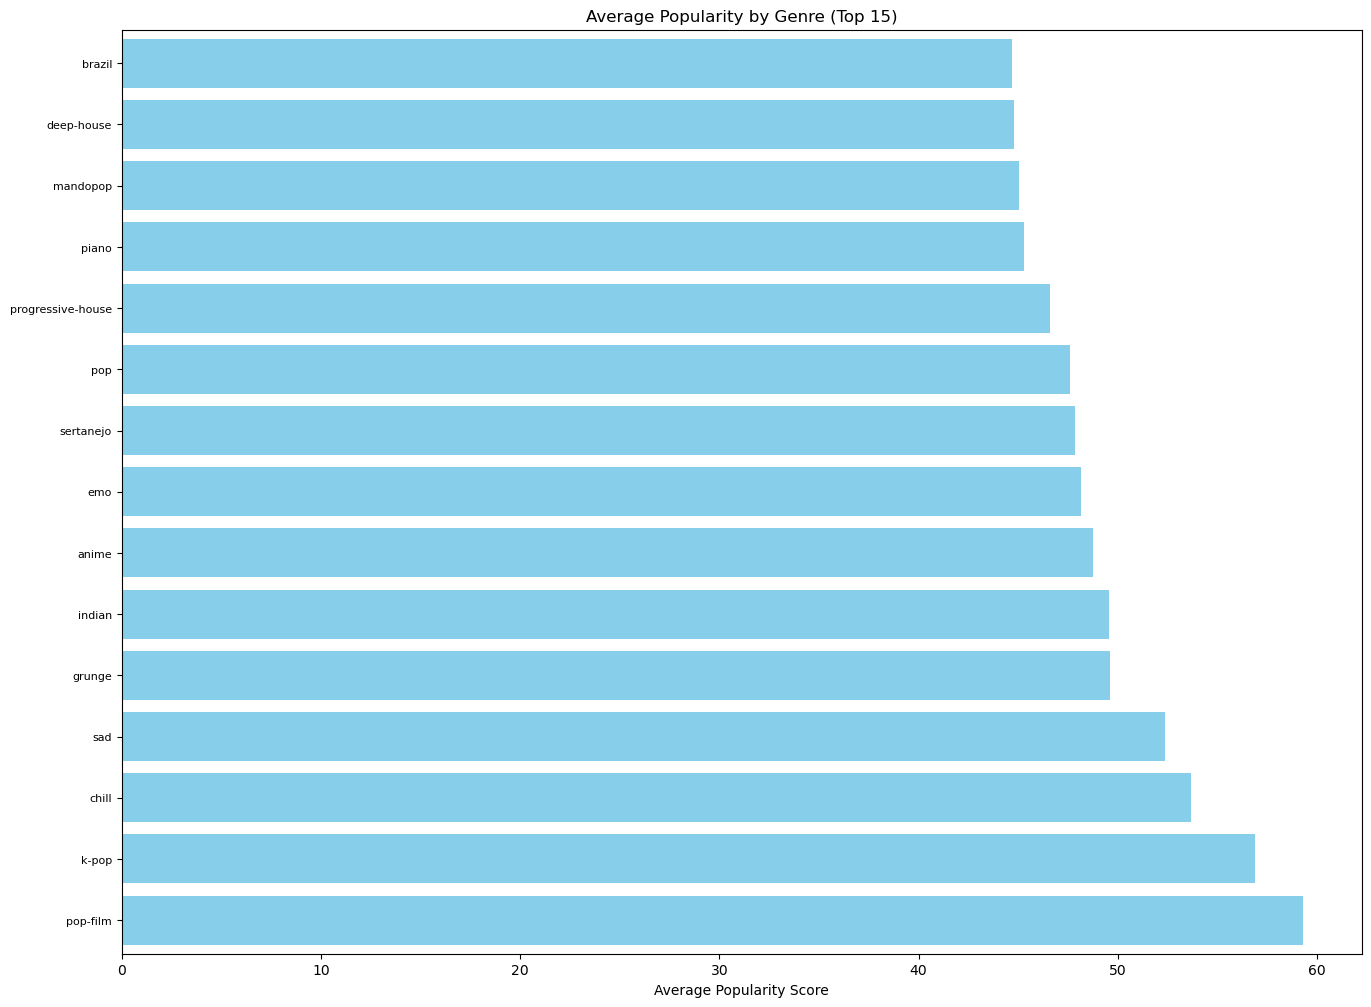

In [54]:
fig, axes = plt.subplots(1, 1, figsize=(16, 12))

# Plot 1: Average Popularity by Genre (Top 15)
if 'track_genre' in df.columns:
    genre_popularity = df.groupby('track_genre')['popularity'].mean().sort_values(ascending=False).head(15)
    axes.barh(range(len(genre_popularity)), genre_popularity.values, color='skyblue')
    axes.set_yticks(range(len(genre_popularity)))
    axes.set_yticklabels(genre_popularity.index, fontsize=8)
    axes.set_title('Average Popularity by Genre (Top 15)')
    axes.set_xlabel('Average Popularity Score')
    axes.margins(y=0.01)


## Optimal Song Characteristics 
What's the perfect song formula? We will investigate whether there is a link between certain genres/audio features and popularity



 Question 4: What's the perfect song formula?

Analyzing 23430 high-popularity songs vs 23462 low-popularity songs


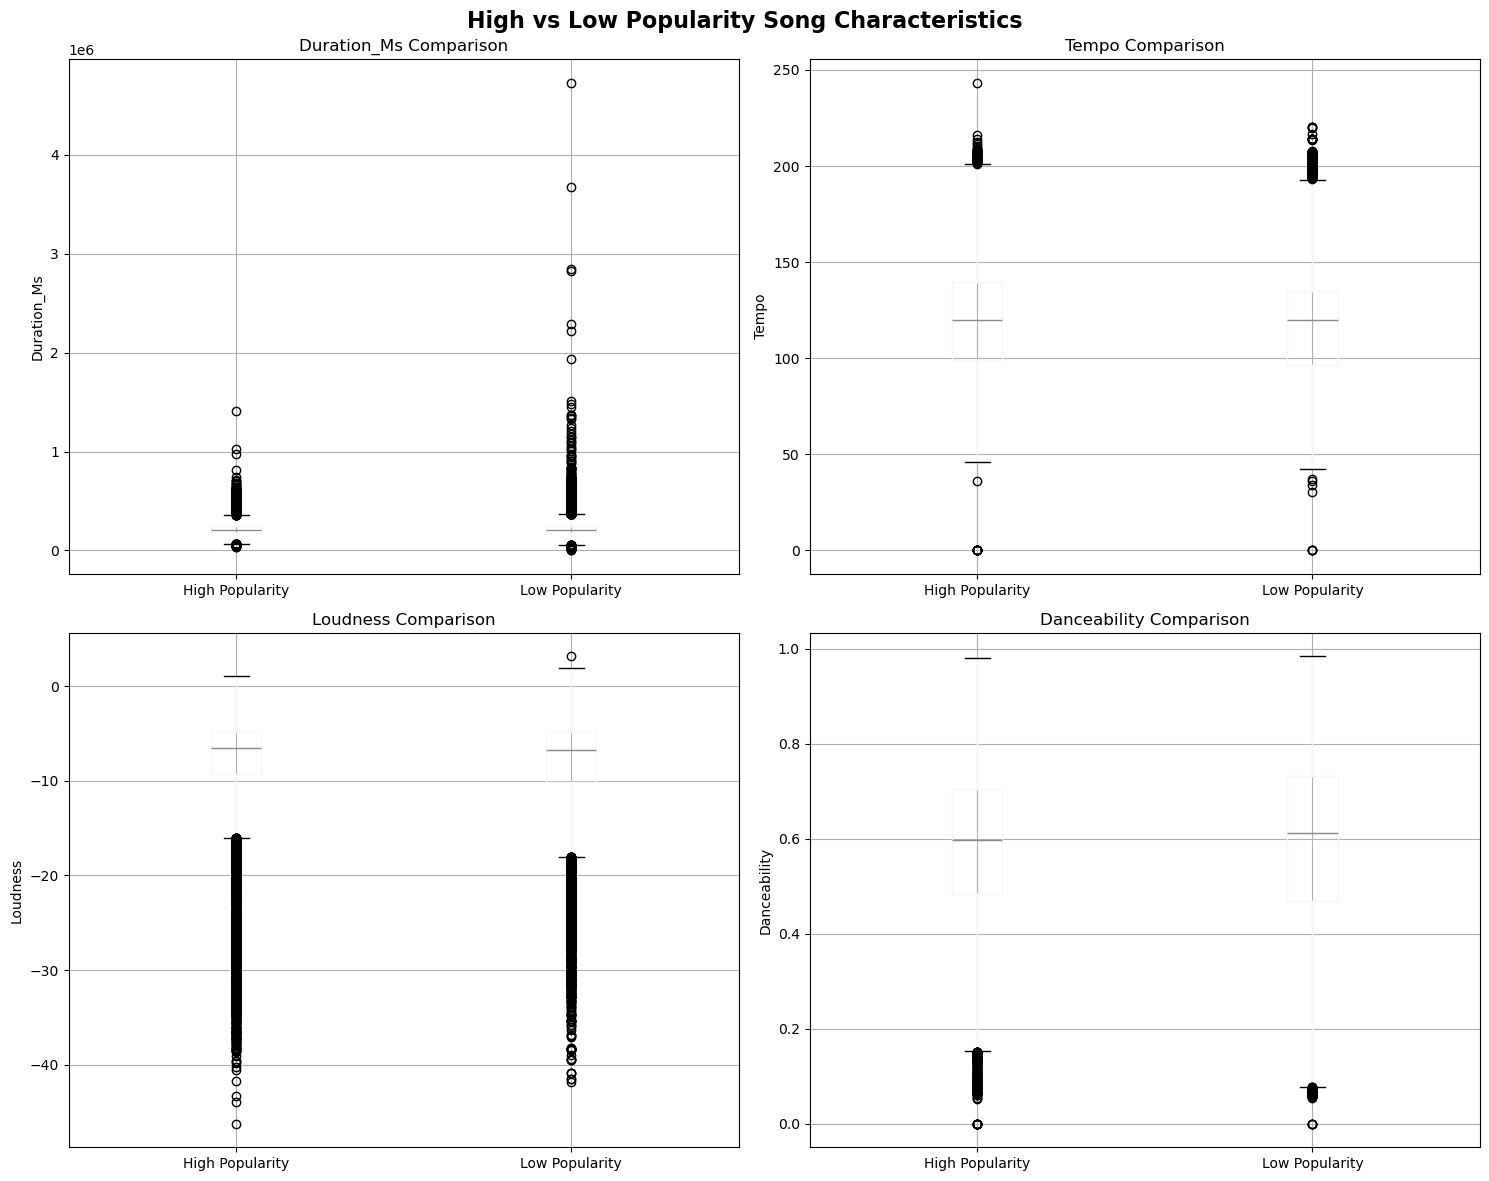

In [69]:
print("\n Question 4: What's the perfect song formula?")

if 'popularity' in df.columns:
    
    # Define high-popularity songs (top 20%)
    popularity_threshold = df['popularity'].quantile(0.8)
    high_pop_songs = df[df['popularity'] >= popularity_threshold]
    low_pop_songs = df[df['popularity'] <= df['popularity'].quantile(0.2)]
    
    print(f"\nAnalyzing {len(high_pop_songs)} high-popularity songs vs {len(low_pop_songs)} low-popularity songs")
    
    # Compare characteristics
    comparison_features = []
    if 'duration_ms' in df.columns:
        comparison_features.append('duration_ms')
    if 'tempo' in df.columns:
        comparison_features.append('tempo')
    if 'loudness' in df.columns:
        comparison_features.append('loudness')
    
    comparison_features.extend([f for f in available_features if f in df.columns])
    
    if comparison_features:
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        fig.suptitle('High vs Low Popularity Song Characteristics', fontsize=16, fontweight='bold')
        
        for i, feature in enumerate(comparison_features[:4]):
            row, col = i // 2, i % 2
            
            # Create comparison data
            comparison_data = pd.DataFrame({
                'High Popularity': high_pop_songs[feature],
                'Low Popularity': low_pop_songs[feature]
            })
            
            # Box plot comparison
            comparison_data.boxplot(ax=axes[row, col])
            axes[row, col].set_title(f'{feature.title()} Comparison')
            axes[row, col].set_ylabel(feature.title())
        
        plt.tight_layout()

In [72]:
# Print optimal ranges
print("\n🎯 Optimal Song Characteristics (High Popularity Songs):")
for feature in comparison_features[:6]:
        mean_val = high_pop_songs[feature].mean()
        median_val = high_pop_songs[feature].median()
        print(f"{feature.title()}: Mean = {mean_val:.3f}, Median = {median_val:.3f}")


🎯 Optimal Song Characteristics (High Popularity Songs):
Duration_Ms: Mean = 219005.491, Median = 210165.000
Tempo: Mean = 121.262, Median = 120.146
Loudness: Mean = -7.849, Median = -6.574
Danceability: Mean = 0.586, Median = 0.597
Energy: Mean = 0.636, Median = 0.672
Valence: Mean = 0.466, Median = 0.451


In [73]:
print("\n" + "="*60)
print("🎵 KEY FINDINGS SUMMARY")
print("="*60)

insights = []

# Popularity insights
if 'popularity' in df.columns and len(available_features) > 0:
    for feature in available_features[:3]:
        corr = df[feature].corr(df['popularity'])
        if abs(corr) > 0.1:
            direction = "positively" if corr > 0 else "negatively"
            insights.append(f"• {feature.title()} is {direction} correlated with popularity (r={corr:.3f})")

# Evolution insights
if 'year' in df.columns and 'decade' in df.columns:
    insights.append(f"• Dataset covers {df['year'].min()} to {df['year'].max()}")
    
# Happiness insights
if 'valence' in df.columns and 'popularity' in df.columns:
    valence_corr = df['valence'].corr(df['popularity'])
    if valence_corr > 0.05:
        insights.append(f"• Happier songs tend to be more popular (correlation: {valence_corr:.3f})")
    elif valence_corr < -0.05:
        insights.append(f"• Sadder songs tend to be more popular (correlation: {valence_corr:.3f})")

# General insights
insights.extend([
    f"• Dataset contains {len(df):,} unique tracks",
    f"• Average popularity score: {df['popularity'].mean():.1f}" if 'popularity' in df.columns else "",
    f"• Most common decade: {df['decade'].mode()[0]}s" if 'decade' in df.columns else ""
])

for insight in insights:
    if insight:  # Only print non-empty insights
        print(insight)

print("\n" + "="*60)


🎵 KEY FINDINGS SUMMARY
• Dataset contains 114,000 unique tracks
• Average popularity score: 33.2

